In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('WorldCupcleaned.csv')
print(df.head())

print

     Stage         Stadium         City Home Team Name  Home Team Goals  \
0  Group 1         Pocitos  Montevideo          France                4   
1  Group 4  Parque Central  Montevideo             USA                3   
2  Group 2  Parque Central  Montevideo      Yugoslavia                2   
3  Group 3         Pocitos  Montevideo         Romania                3   
4  Group 1  Parque Central  Montevideo       Argentina                1   

   Away Team Goals Away Team Name  Attendance  
0                1         Mexico      4444.0  
1                0        Belgium     18346.0  
2                1         Brazil     24059.0  
3                1           Peru      2549.0  
4                0         France     23409.0  


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [8]:
nan_value=float("NaN")
df.replace("",nan_value,inplace=True)
df.dropna(subset=["Attendance"],inplace=True)

In [9]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 851
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stage            850 non-null    object 
 1   Stadium          850 non-null    object 
 2   City             850 non-null    object 
 3   Home Team Name   850 non-null    object 
 4   Home Team Goals  850 non-null    int64  
 5   Away Team Goals  850 non-null    int64  
 6   Away Team Name   850 non-null    object 
 7   Attendance       850 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 59.8+ KB


,Home Team Goals,Away Team Goals,Attendance
count,850.000000,850.000000,850.000000
mean,1.810588,1.022353,45164.800000
std,1.612125,1.088853,23485.249247
min,0.000000,0.000000,2000.000000
25%,1.000000,0.000000,30000.000000
50%,2.000000,1.000000,41579.500000
75%,3.000000,2.000000,61374.500000
max,10.000000,7.000000,173850.000000


In [10]:
df.sample(20)

,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance
25,Preliminary round,Littorio,Trieste,Czechoslovakia,2,1,Romania,9000.0
834,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1,0,Switzerland,63255.0
833,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,41242.0
799,Group G,Estadio Castelao,Fortaleza,Germany,2,2,Ghana,59621.0
621,Group C,Seoul World Cup Stadium,Seoul,Turkey,3,0,China PR,43605.0
681,Group D,"FIFA World Cup Stadium, Gelsenkirchen",Gelsenkirchen,Portugal,2,1,Mexico,52000.0
104,Group 3,Jarnvallen,Sandviken,Hungary,1,1,Wales,15343.0
352,Group 4,Vicente Calderon,Madrid,France,4,1,Northern Ireland,37000.0
8,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,57735.0
342,Group 4,San Mames,Bilbao,England,1,0,Kuwait,39700.0


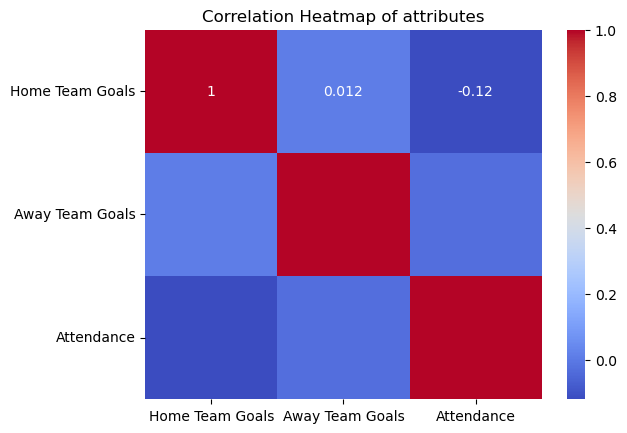

In [11]:
num_df=df.select_dtypes(include = ['int64','float'])

plt.figure
correlation=num_df.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap of attributes')
plt.show()

In [12]:
#The EDA process or exploratory data analaysis process is where you take preprocessed data and then process it by taking out missing values, outliers and other values that do not belong. First we collect the data, find out what variables we need, clean the data and then visualize the results. I used mean median mode, standard deviation, and then used charts to display different types of information. The report shows us how the data is spreadout and it allows us to see the mean, median and mode of all the attributes. The heatmap also shows the correlation between home team goals, away team goals and the amount of attendance. I will be able to add more graphs and visuals within the week. 

<function matplotlib.pyplot.show(close=None, block=None)>

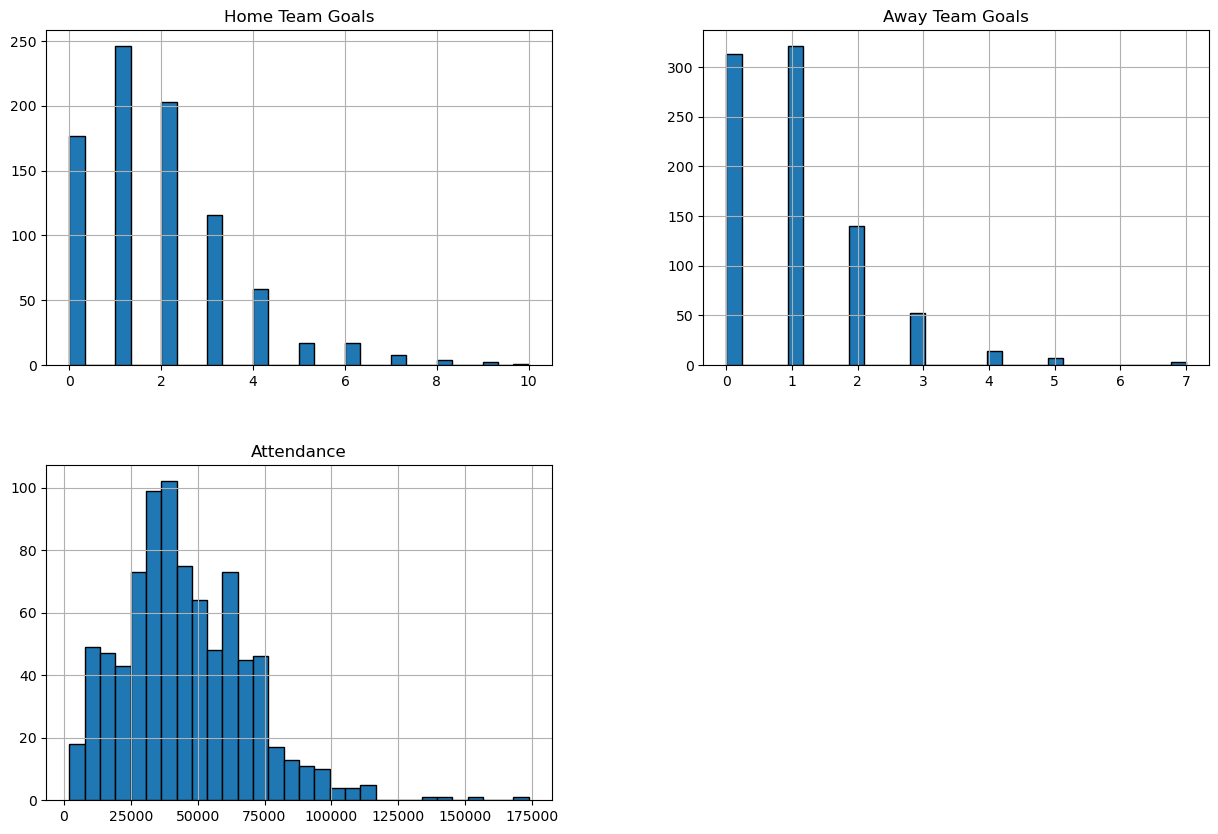

In [13]:
df.hist(figsize=(15,10),bins=30, edgecolor='black')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

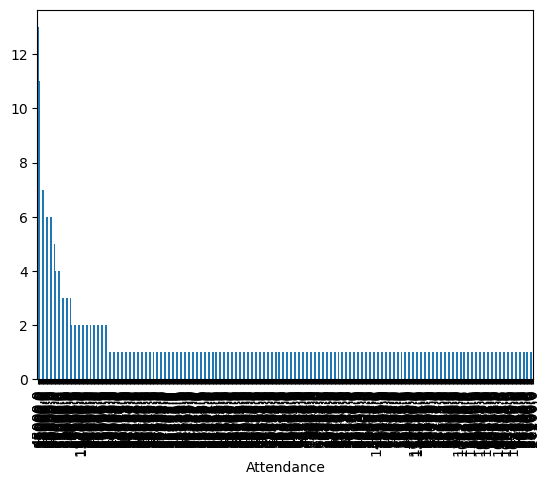

In [14]:
df['Attendance'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

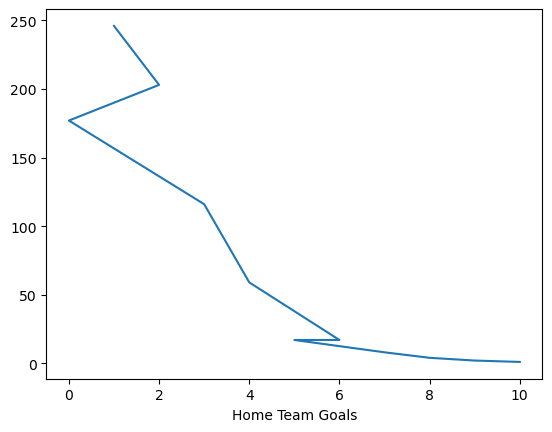

In [15]:
df['Home Team Goals'].value_counts().plot(kind='line')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

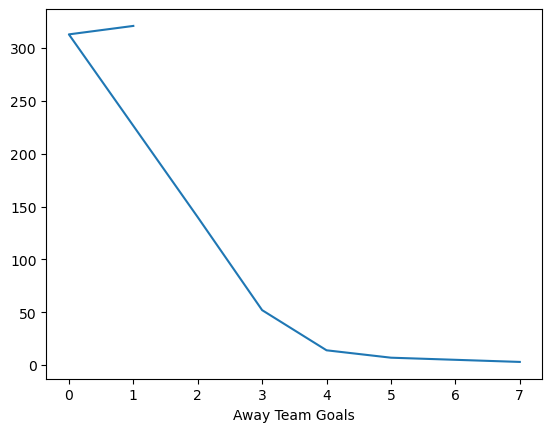

In [16]:
df['Away Team Goals'].value_counts().plot(kind='line')
plt.show

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [23]:
X=df[['Away Team Goals','Home Team Goals']]
y=df['Attendance']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
print(y_pred)

[48677.81403938 42979.26703184 47011.82939876 45345.84475813
 48327.51749655 45960.93977025 47011.82939876 35349.93691439
 47011.82939876 46661.53285592 44645.25167246 46311.23631309
 38681.90619563 47011.82939876 44995.5482153  43944.6585868
 46661.53285592 44645.25167246 47011.82939876 47011.82939876
 48677.81403938 47011.82939876 47011.82939876 44995.5482153
 42013.87547688 44995.5482153  41663.57893405 41313.28239122
 46661.53285592 46661.53285592 48327.51749655 47011.82939876
 43329.56357467 46661.53285592 47011.82939876 46311.23631309
 43679.86011751 47011.82939876 48677.81403938 41663.57893405
 44294.95512963 46661.53285592 44995.5482153  44995.5482153
 44995.5482153  35264.43884084 45345.84475813 45345.84475813
 43329.56357467 47011.82939876 46661.53285592 44995.5482153
 47011.82939876 47011.82939876 45345.84475813 47011.82939876
 46661.53285592 47011.82939876 45345.84475813 46661.53285592
 46661.53285592 48677.81403938 37631.01656713 43329.56357467
 48677.81403938 47977.220953

In [24]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('RMSE:',rmse)
print('R2 score:',r2)

MSE: 411561656.2633435
MAE: 16181.374118179634
RMSE: 20286.982433652953
R2 score: 0.021633801476360515
